In [1]:
from pylab import *


from matplotlib import rc
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'serif': ['Computer Modern'],
        'weight' : 'bold',
        'size'   : 28}

rc('font', **font)
rc('text', usetex=True)
rc('text.latex', preamble=r'\boldmath')

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [73]:
def Draw_Model(x,y,f,name,lw=1,ms=5):
    r = 1.1
    Dic = {}
    natoms = int( len(x) )
    for n in range(natoms):
        a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
        vecinos = [i for i, x in enumerate(a) if x and i!=n]
        Dic[n] = vecinos
        
    H = np.zeros((natoms,natoms))
    
    γ = 1
    λ = 4.5
    for n in Dic.keys():
        vecinos = Dic[n]
        for v in vecinos:
            f0 = f[n]
            f1 = f[v]
            if f0 == f1:
                fase = γ
            else: 
                fase = λ
            H[n,v] = fase
            H[v,n] = fase

    f0 = 0
    f1 = 0
    fase = 1
    for n in Dic.keys():
        vecinos = Dic[n]
        for v in vecinos:
            posx     = x[n]
            posy     = y[n]
            f0       = f[n]
            f1       = f[v] 
            if f0 == f1:
                fase = γ
            else: 
                fase = λ

            if ( posx%2==0 and posy%2==0  ):
                if ( x[v] > x[n] ):
                    H[(n,v)] = -fase
                    H[(v,n)] = -fase
            elif(posx%2==1 and posy%2==1):
                if ( x[v] > x[n] ):
                    H[(n,v)] = -fase
                    H[(v,n)] = -fase
            else:
                pass
            
    Hop = {}
    for i in Dic.keys():
        Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]
        
        
    Rx = []
    Ry = []
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Rx.append(rx)
        Ry.append(ry)
    
    fig, ax = plt.subplots(figsize=(6,6))
   

    boxes = []
    for i in range(len(Rx)):
        rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
        boxes.append(rect)
    for i in Dic.keys():
        c = 0
        for v in Dic[i]:
            if Hop[i][c] == 1:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = lw)
            elif Hop[i][c] == -1:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = lw, ls = ':')
            elif Hop[i][c] == 4.5:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = lw)
            elif Hop[i][c] == -4.5:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = lw, ls = ':')
            c+=1  


    ax.plot(x,y, marker='o', color='black', markersize=ms,linestyle="")
    pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
    ax.add_collection(pc)
    fig.tight_layout()
    ax.set_aspect('equal')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis("off")
    fig.tight_layout()
    fig.savefig('{}.pdf'.format(name))
    return(fig,ax)

## Figures SSH model

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

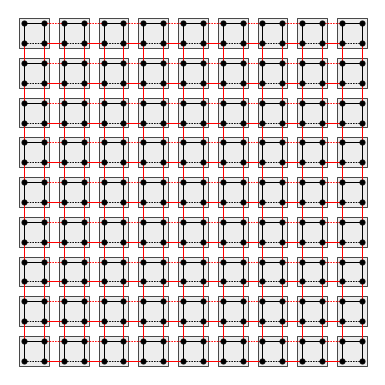

In [74]:
x,y,f = np.loadtxt("array_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
Draw_Model(x,y,f,'square_hoti_model')

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

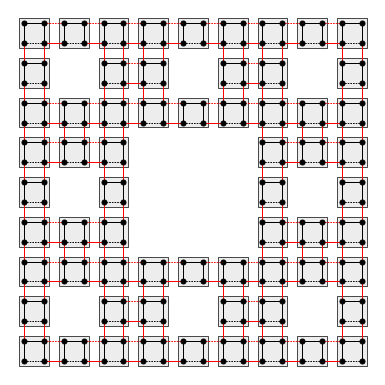

In [75]:
x,y,f = np.loadtxt("LatticeSierpinski_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
Draw_Model(x,y,f,'fractal_hoti_model')

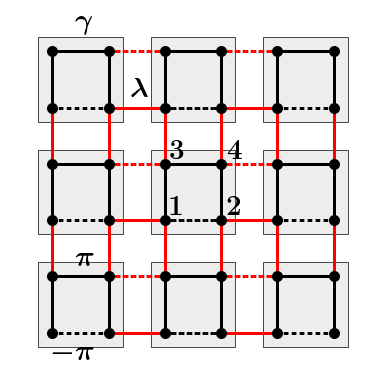

In [76]:
x,y,f = np.loadtxt("array_6x6.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
fig,ax = Draw_Model(x,y,f,'square_hoti_model6',lw=3,ms=10)

ax.set_ylim((-0.8,5.8))
ax.set_xlim((-0.8,5.8))

ax.text(0.4,5.4,'$\gamma$')
ax.text(1.4,4.2,'$\lambda$')

ax.text(0.4,1.2,'$\pi$')
ax.text(0.0,-0.4,'$-\pi$')

ax.text(2.1,3.1,'$3$')
ax.text(3.1,3.1,'$4$')
ax.text(2.1,2.1,'$1$')
ax.text(3.1,2.1,'$2$')

fig.savefig('square_hoti_model6.pdf')

## Figures Fractales

In [67]:
def Sierpinsky_carpet(N,name,l=20):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.add_patch(Rectangle((0,0),l,l, facecolor='black'))
    ax.set_ylim((0,l))
    ax.set_xlim((0,l))
    ax.set_xticks([])
    ax.set_yticks([])
    for n in range(N):
        Squares = []
        for i in range(3**n):
            for j in range(3**n):
                h = 3**n
                if i%3==1 and j%3==1:
                    rec = Rectangle((l*i/h, l*j/h), l/h,l/h,facecolor='white')
                    ax.add_patch(rec)
    fig.savefig('{}.pdf'.format(name))
    plt.show()

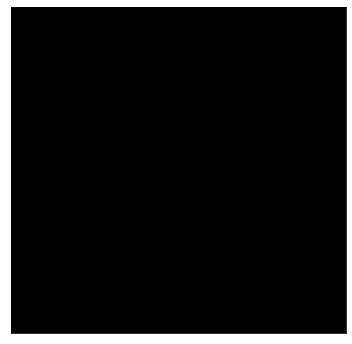

In [68]:
Sierpinsky_carpet(1,'sierpinski_carpet_1')

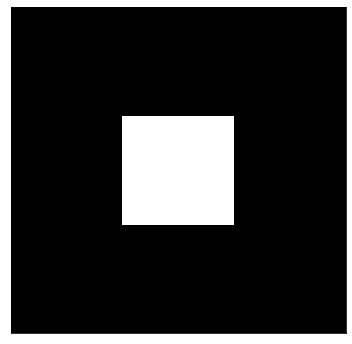

In [69]:
Sierpinsky_carpet(2,'sierpinski_carpet_2')

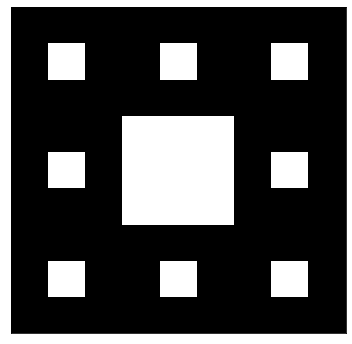

In [70]:
Sierpinsky_carpet(3,'sierpinski_carpet_3')

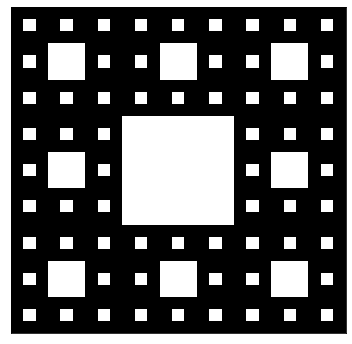

In [71]:
Sierpinsky_carpet(4,'sierpinski_carpet_4')